In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = r"F:\INTERNSHIP\PYTHON\practice_data.xlsx"
df = pd.read_excel(file_path)

df.head()


,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [5]:
print(df.dtypes)  
print("\nMissing Values:\n", df.isna().sum()) 

EmployeeID                        int64
gender                           object
department                       object
Days Present                      int64
Accuracy of Work                 object
Meeting Project Deadlines        object
Task Completion Rates             int64
Interpersonal Skills Rating       int64
Decision-Making Skills Rating     int64
Sales Revenue Generated           int64
churned                          object
dtype: object

Missing Values:
 EmployeeID                       0
gender                           0
department                       0
Days Present                     0
Accuracy of Work                 0
Meeting Project Deadlines        0
Task Completion Rates            0
Interpersonal Skills Rating      0
Decision-Making Skills Rating    0
Sales Revenue Generated          0
churned                          0
dtype: int64


# KDE 

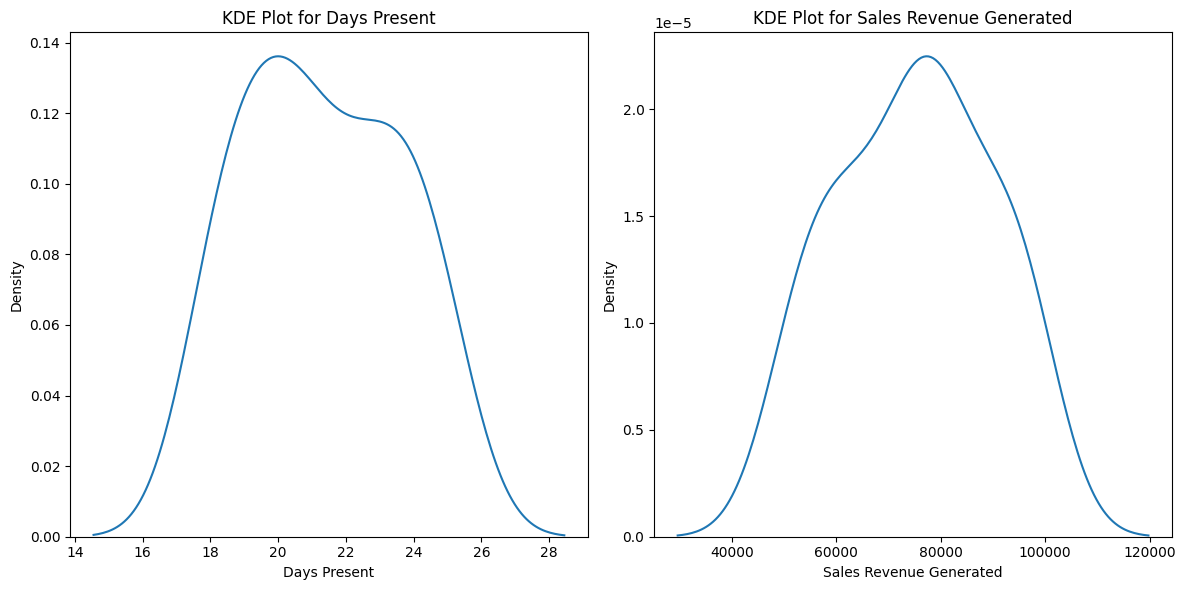

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.kdeplot(df['Days Present'], ax=axes[0])
axes[0].set_title("KDE Plot for Days Present")

sns.kdeplot(df['Sales Revenue Generated'], ax=axes[1])
axes[1].set_title("KDE Plot for Sales Revenue Generated")

plt.tight_layout()
plt.show()


# Range of Highest Sales Revenue Generated


In [7]:
highest_sales_range = df['Sales Revenue Generated'].describe()[['max', '75%']]
print("Range of highest Sales Revenue Generated:", highest_sales_range)


Range of highest Sales Revenue Generated: max    97797.0
75%    86373.0
Name: Sales Revenue Generated, dtype: float64


# normility test

In [9]:
from scipy.stats import shapiro

numeric_columns = ['Days Present', 'Task Completion Rates', 'Sales Revenue Generated']
shapiro_results = {}

for column in numeric_columns:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = round(p_value, 3)

shapiro_results


{'Days Present': np.float64(0.044),
 'Task Completion Rates': np.float64(0.321),
 'Sales Revenue Generated': np.float64(0.12)}

# square root transformation 

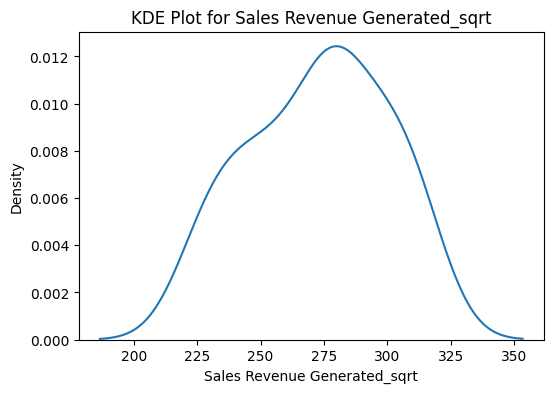

np.float64(0.099)

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"F:\INTERNSHIP\PYTHON\practice_data.xlsx"  
df = pd.read_excel(file_path)

def sqrt_transformation(data, column_name):
    data[f'{column_name}_sqrt'] = np.sqrt(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_sqrt'])
    
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data[f'{column_name}_sqrt'])
    plt.title(f"KDE Plot for {column_name}_sqrt")
    plt.show()
    
    return round(p_value, 3)

sqrt_transformation(df, 'Sales Revenue Generated')


# boxcox transformation

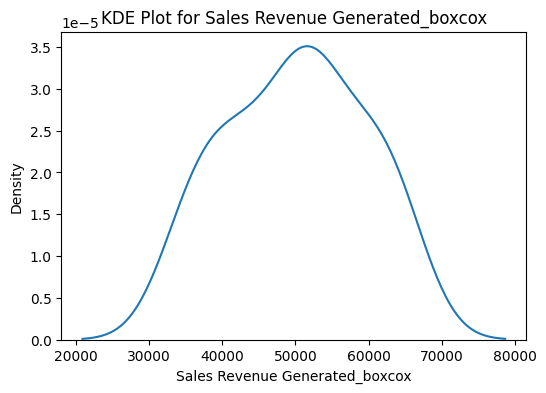

np.float64(0.119)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, shapiro

file_path = r"F:\INTERNSHIP\PYTHON\practice_data.xlsx"  
df = pd.read_excel(file_path)

def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name] + 1) 
    data[f'{column_name}_boxcox'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_boxcox'])
    
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data[f'{column_name}_boxcox'])
    plt.title(f"KDE Plot for {column_name}_boxcox")
    plt.show()
    
    return round(p_value, 3)

boxcox_transformation(df, 'Sales Revenue Generated')


# yeojohnson_transformation

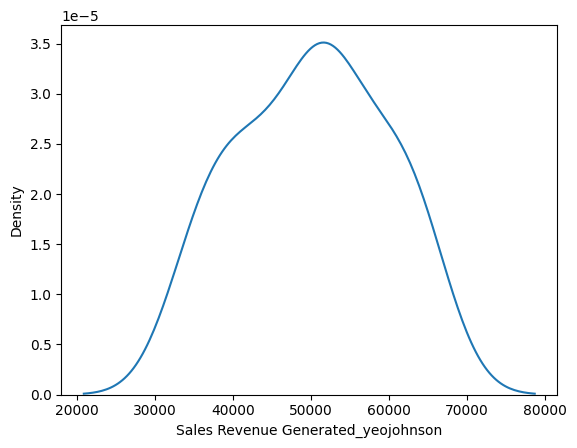

P value: 0.1187535189210972


In [27]:
from scipy.stats import yeojohnson, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"F:\INTERNSHIP\PYTHON\practice_data.xlsx"
df = pd.read_excel(file_path)

def yeojohnson_transformation(data, column_name):
    data[f'{column_name}_yeojohnson'], _ = yeojohnson(data[column_name])
    sns.kdeplot(data[f'{column_name}_yeojohnson'])
    plt.show()
    stat, p_value = shapiro(data[f'{column_name}_yeojohnson'])
    print('P value:', p_value)

yeojohnson_transformation(df, 'Sales Revenue Generated')


# One-Sample T-Test

In [35]:
from scipy import stats

hypothesis_mean = 68

# Perform one-sample t-test on 'Sales Revenue Generated'
t_statistic, p_value = stats.ttest_1samp(df['Sales Revenue Generated'], hypothesis_mean)

print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and 68.")


P-value: 2.2746688806072735e-23
Reject the null hypothesis. There is a significant difference between the average purchase amount and 68.
